In [2]:
from keras import backend

Using TensorFlow backend.


In [3]:
backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import optimizers
from keras.models import Sequential

In [5]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape)

(60000, 28, 28, 1)


In [9]:
y_train = to_categorical(y_train, num_classes = 10, dtype = int)
y_test = to_categorical(y_test, num_classes = 10, dtype = int)

In [15]:
model = Sequential()
model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3, 3), padding = 'valid', strides = (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = adam)


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                422550    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 423,560
Trainable params: 423,560
Non-trainable params: 0
_________________________________________________________________


In [21]:
%%time
history = model.fit(x_train, y_train, validation_split = 0.3, verbose = 2, epochs = 100, batch_size = 50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 18s - loss: 6.8881 - acc: 0.5655 - val_loss: 3.7782 - val_acc: 0.7570
Epoch 2/100
 - 18s - loss: 2.5263 - acc: 0.8211 - val_loss: 0.1469 - val_acc: 0.9597
Epoch 3/100
 - 18s - loss: 0.0892 - acc: 0.9750 - val_loss: 0.0998 - val_acc: 0.9723
Epoch 4/100
 - 18s - loss: 0.0401 - acc: 0.9883 - val_loss: 0.0970 - val_acc: 0.9753
Epoch 5/100
 - 18s - loss: 0.0246 - acc: 0.9934 - val_loss: 0.1042 - val_acc: 0.9759
Epoch 6/100
 - 18s - loss: 0.0208 - acc: 0.9935 - val_loss: 0.1143 - val_acc: 0.9754
Epoch 7/100
 - 19s - loss: 0.0200 - acc: 0.9937 - val_loss: 0.1449 - val_acc: 0.9717
Epoch 8/100
 - 18s - loss: 0.0208 - acc: 0.9937 - val_loss: 0.1331 - val_acc: 0.9759
Epoch 9/100
 - 18s - loss: 0.0162 - acc: 0.9951 - val_loss: 0.1403 - val_acc: 0.9755
Epoch 10/100
 - 18s - loss: 0.0104 - acc: 0.9968 - val_loss: 0.1482 - val_acc: 0.9760
Epoch 11/100
 - 18s - loss: 0.0155 - acc: 0.9956 - val_loss: 0.1548 - val_acc: 0.9751
Epoch 12/100


Epoch 96/100
 - 18s - loss: 0.0182 - acc: 0.9986 - val_loss: 0.3064 - val_acc: 0.9786
Epoch 97/100
 - 18s - loss: 0.0169 - acc: 0.9985 - val_loss: 0.2964 - val_acc: 0.9792
Epoch 98/100
 - 18s - loss: 0.0143 - acc: 0.9988 - val_loss: 0.3165 - val_acc: 0.9778
Epoch 99/100
 - 18s - loss: 0.0135 - acc: 0.9989 - val_loss: 0.3121 - val_acc: 0.9784
Epoch 100/100
 - 18s - loss: 0.0137 - acc: 0.9988 - val_loss: 0.3033 - val_acc: 0.9791
Wall time: 29min 38s


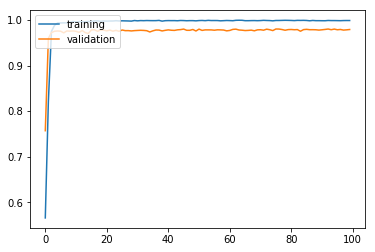

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [23]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 195us/step


In [24]:
print(result[1])

0.9801


In [11]:
def deep_model():
    model = Sequential()
    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), kernel_size = (3, 3), filters = 50, strides = (1, 1), padding = 'same', kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, strides = (1, 1), padding = 'same', kernel_initializer = 'he_normal', kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 50, strides = (1, 1), padding = 'same', kernel_initializer = 'he_normal', kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, strides = (1, 1), padding = 'same', kernel_initializer = 'he_normal', kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 50, strides = (1, 1), padding = 'same', kernel_initializer = 'he_normal', kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, strides = (1, 1), padding = 'same', kernel_initializer = 'he_normal', kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, metrics = ['acc'], loss = 'categorical_crossentropy')
    return model

In [12]:
model = deep_model()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [39]:
history = model.fit(x_train, y_train, batch_size = 50, verbose = 2, epochs = 20, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 122s - loss: 0.0482 - acc: 0.9912 - val_loss: 0.0268 - val_acc: 0.9929
Epoch 2/20
 - 121s - loss: 0.0462 - acc: 0.9912 - val_loss: 0.0284 - val_acc: 0.9923
Epoch 3/20
 - 122s - loss: 0.0382 - acc: 0.9930 - val_loss: 0.0259 - val_acc: 0.9927
Epoch 4/20
 - 121s - loss: 0.0351 - acc: 0.9933 - val_loss: 0.0262 - val_acc: 0.9924
Epoch 5/20
 - 122s - loss: 0.0333 - acc: 0.9936 - val_loss: 0.0262 - val_acc: 0.9928
Epoch 6/20
 - 121s - loss: 0.0307 - acc: 0.9939 - val_loss: 0.0251 - val_acc: 0.9935
Epoch 7/20
 - 123s - loss: 0.0301 - acc: 0.9939 - val_loss: 0.0256 - val_acc: 0.9936
Epoch 8/20
 - 125s - loss: 0.0278 - acc: 0.9942 - val_loss: 0.0265 - val_acc: 0.9934
Epoch 9/20
 - 125s - loss: 0.0248 - acc: 0.9949 - val_loss: 0.0273 - val_acc: 0.9939
Epoch 10/20
 - 127s - loss: 0.0254 - acc: 0.9945 - val_loss: 0.0310 - val_acc: 0.9921
Epoch 11/20
 - 122s - loss: 0.0247 - acc: 0.9947 - val_loss: 0.0288 - val_acc: 0.9928
Epoch 12/20
 

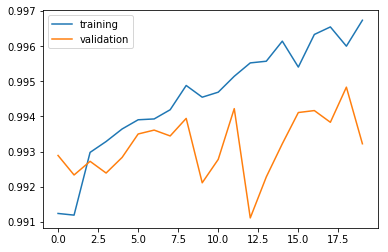

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [41]:
result = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 582us/step


In [42]:
print(result[1])

0.9939


In [43]:
y_predict = model.predict(x_test)

In [46]:
y_predict = np.argmax(y_predict, axis = 1)

In [47]:
print(y_predict)

[7 2 1 ... 4 5 6]


In [51]:
# plt.imshow(x_test[0])
print(x_test[0].shape)

(28, 28, 1)


In [52]:
x_plot = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))

In [53]:
print(x_plot.shape)

(10000, 28, 28)


9


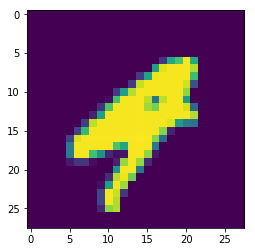

In [63]:
plt.imshow(x_plot[447])
print(y_predict[447])

(10000, 10)
115 9
445 0
447 9
582 2
938 5
947 9
1014 0
1039 1
1114 8
1242 9
1247 5
1260 1
1393 3
1500 1
1621 6
1901 4
2035 3
2118 0
2130 9
2135 1
2308 5
2326 2
2454 5
2462 0
2597 3
2654 1
2927 2
2938 9
3030 0
3225 9
3422 0
3520 2
3558 0
3762 8
3808 8
4078 2
4176 7
4201 7
4289 7
4536 5
4740 5
4783 9
4860 9
5165 6
5654 2
5955 8
5981 9
5997 9
6172 2
6576 1
6597 7
6651 6
8061 9
8316 2
8408 5
8527 9
9015 2
9019 2
9638 7
9729 6
9792 9


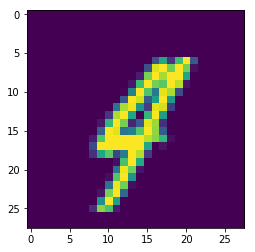

In [60]:
print(y_test.shape)
for i in range(x_test.shape[0]):
    if(np.argmax(y_test[i]) != y_predict[i]):
        print(i, y_predict[i])
        plt.imshow(x_plot[i])
        plt.plot()

In [69]:
import pandas as pd

In [73]:
d = []
for i in range(y_predict.shape[0]):
    d.append({'ImageId': i, 'Label' : y_predict[i]})
df = pd.DataFrame(d)

In [74]:
export_csv = df.to_csv(r'digitSub.csv', index = None, header = True)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 50)        0         
__________